# imports

In [1]:
!pip install gymnasium
!pip install gymnasium[classic-control]

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import random
import gymnasium as gym
from collections import deque
from matplotlib import pyplot as plt
import copy

# classes for nn

## actiovations and derivatives

In [3]:
def Sigmoid(x):
    res = 1 / (1 + np.exp(-x))
    return res

def d_Sigmoid(x):
    y = x * (1 - x)
    return y

def ReLU(x):
    x = np.maximum(0, x)
    return x
    
def d_ReLU(x): 
    x[x<=0] = 0
    x[x>0] = 1
    return x


def Linear(x):
    return x

def d_Linear(x):
    y = np.ones(shape=(x.shape), dtype = x.dtype)
    return y

activations_dict = {
'Sigmoid': [Sigmoid, d_Sigmoid],
'ReLU': [ReLU, d_ReLU], 
'Linear': [Linear, d_Linear]
}


## layer

In [4]:
class layer:
    def __init__(s, lr = 0.1, prev_size = 2, my_size=2, activation_type = "Sigmoid"):
        s.lr = lr
        s.size = my_size
        s.prev_size = prev_size
        s.weights = np.random.random((prev_size, s.size))
        funcs = activations_dict.get(activation_type)
        s.activation_f = funcs[0]
        s.d_activation_f = funcs[1]


    def activate(s, x):
        return s.activation_f(x)
        
    def d_activate(s, x):
        return s.d_activation_f(x)  

    def forward(s, inputs):
        s.input = np.asarray(inputs)
        s.neurons = np.dot(s.input, s.weights)
        s.neurons_activated = s.activate(s.neurons)
        
        return s.neurons_activated

    def backprop(s, layer_error): # for output here layer_error = target_val - s.forward
        s.delta = layer_error * s.d_activate(s.neurons_activated)
        
        s.prev_layer_error = np.dot(s.delta, s.weights.T)
        return s.prev_layer_error
        
    def update_weights(s):
        s.input_t = s.input.T
        #print("input_t: ", input_t.shape)
        #print("delta: ", s.delta.shape)
        
        s.v = s.input_t.reshape((s.input_t.shape[0], 1))
        #print("v: ", v.shape)

        s.d = s.delta.reshape((1, s.delta.shape[0]))
        s.weights += s.lr * np.dot(s.v, s.d)
        
    def print_info(s):
        print("my size: ", s.size)
        print("w: ", s.weights, "\n")
        
    def print_pic(s):
        print_size = min(2, s.size)
        print("\n╻...\nv...")
        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
            print('O\t', end='')
        print ("--", format(s.size, ' 5d') , "--\t", end='')

    def add_neuron(s):     
        add_w = np.zeros(shape=(s.prev_size, 1), dtype=float) + 0.1
        s.weights = np.concatenate((s.weights, add_w.T))
        s.size+=1


class input_layer:
    def __init__(s, size):
        s.size = size
        s.values = np.zeros(shape=(size), dtype = float)

    def print_info(s):
        print("IN LAYER\nsize: ", s.size)
        print(s.values)

    def print_pic(s):
        print_size = min(2, s.size)

        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
                
            print("| |\t", end='')
        print("")
        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
            print(" v \t", end='')
        print("")
        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
            print(' @\t', end='')
        print ("--", format(s.size, ' 5d') , "--\t", end='')

    def forward(s, x):
        return x
        
        


## NN

In [5]:

class plastic_nn:
    def __init__(s):
        s.layers = []
        s.n_of_layers = 0
        
        pass
        
    def deep_copy(s):
        return copy.deepcopy(s)

    def forward(s, data):
        for lay in layers:
            data = lay.forward(data)
        s.last_result = data
        return s.last_result
        
    
    def backprop(s, correct):
        err = correct-s.last_result

        for lay in reversed(layers[1:]):
            err = lay.backprop(err)

    def backprop_error(s, err):
        #err = correct-s.last_result

        for lay in reversed(layers[1:]):
            err = lay.backprop(err)

    def update_w(s):
        for lay in reversed(layers[1:]):
            lay.update_weights()

    def learn_one(s, in_data, target_data):
        pnn.forward(in_data)
        pnn.backprop(target_data)
        pnn.update_w()   
        
    def append_one(s, new_layer, check = False):
        if check and s.n_of_layers!=0:
            last_layer_size = s.layers[-1].size
            if last_layer_size != new_layer.prev_size:
                print("size not match, layer ", s.n_of_layers)
                return
        s.layers.append(new_layer)
        s.n_of_layers+=1
        pass

    def check_layers_sizes(s, check_layers):
        #print("CHECK")
        for i in range(1, len(check_layers)):
            #print(i)
            #print("check_layers[i-1].size ",check_layers[i-1].size)
            #print("check_layers[i].prev_size ",check_layers[i].prev_size)
            if (check_layers[i-1].size != check_layers[i].prev_size):
                print("error between ", i-1, "and ", i)
                return False
        return True
        
    def append(s, new_layers):
        test_layers = np.array([])
        if s.n_of_layers != 0:
            test_layers = s.layers[-1]
            
        test_layers = np.append(test_layers, new_layers)
                
        if (s.check_layers_sizes(test_layers)):
            for lay in new_layers:
                s.append_one(lay)

            print("added succesfully")
            return True
        else:
            print("ERROR adding layers, check info above")
            return False

    def print_info(s):
        print("Num of layers: ", s.n_of_layers)
        for cnt in range(s.n_of_layers):
            print("#", cnt)
            s.layers[cnt].print_info()
            print("")
    
    def print_pic(s):
        print("Num of layers: ", s.n_of_layers)
        cnt = 0
        for lay in s.layers:
            lay.print_pic()
            print("#", cnt, end='')
            cnt+=1
        print("\nOUT |#|\nOUT  v")




# memory

In [6]:
def cart_pole_action_to_human(val):
    if (val):
        return "right";
    else:
        return "left";

def cart_pole_state_to_human(val):
    return "Cart Position ", val[0] #, "Cart Velocity ", val[1], "Pole Angle ", val[2], "Pole Angular Velocity ", val[3]



class replay_memory:
    def __init__(s, maxlen):
        s.memory = deque([], maxlen=maxlen)

    def append(s, val):
        s.memory.append(val)
        
    def clear(s):
        s.memory.clear()

    def get_sample(s, sample_size):
        return random.sample(s.memory, sample_size)

    def __len__(s):
        return len(s.memory)

    #cur_state, action, next_state, reward, terminated
    def print(s):
        for m in s.memory:
            print("state: ", cart_pole_state_to_human(m[0]))
            print("action: ", cart_pole_action_to_human(m[1]))
            print("next state: ", cart_pole_state_to_human(m[2]))
            print("reward: ", m[3])
            print("termninated?: ", m[4])
            print("\n")


# env run

In [7]:
bar_len = 50

def display_bar(bar_len, idx, total):
    idx = int(idx*bar_len/total)
    #print(perc)
    print("[", "-"*idx, "*", "-"*(bar_len-idx-1), "]",end='')
    print("\r",end='')

class test_env():
    def __init__(s, env_name, render_mode = ''): 
        s.reward_discount = 0.99 #gamma
        
        s.brain = plastic_nn()
        
        s.render_mode = render_mode
        s.env = gym.make(env_name)#, render_mode="human")
    
        s.memory = replay_memory(maxlen=10000)
        s.explore_prob = 0.85 # epsilon
        s.explore_disc_rate = 0.05
        
    def set_brain_layers(s, layers):
        s.brain.append(layers)
        
    def close_env(s):
        s.env.close()
        
    def choose_action(s, state):
        if (random.random() < s.explore_prob): 
            action = s.env.action_space.sample() # explore
            if (s.explore_prob>0):
                s.explore_prob-=s.explore_disc_rate
        else:
            action = s.brain.forward(state).argmax().item()
            # this is where you would insert your policy
            #action = 1 # right
        return action

    def save_memory(s, prev_state, action, state, reward, terminated):
        s.memory.append((prev_state, action, state, reward, terminated)) 

    def run_one_game(s):
        reward_sum = 0
        iteration = 0
        
        prev_state, info = s.env.reset(seed=42) # seed=42
        prev_reward = 0
        
        terminated = False
        truncated = False
        while (not terminated and not truncated):
            iteration += 1
            
            action = s.choose_action(prev_state)
            
            state, reward, terminated, truncated, info = s.env.step(action) 

            # if (terminated or truncated):
            #     if (iteration == 199):
            #         reward = 5
            #     else:
            #         reward = -5
                
            reward_sum += reward
            
            s.save_memory(prev_state, action, state, reward_sum, terminated)
            
            prev_state = state
            
            
        return reward_sum

    def optimize(s):
        last_brain = s.brain.deep_copy()

        #batch = s.memory.get_sample(len(s.memory))
        #print(len(s.memory))
        #s.memory.print()
        i = 0
        
        for state, action, new_state, reward, terminated in s.memory.memory:
            #print(i, 'state: ', state, ' action: ', action, '\nnew state: ',new_state,' reward: ', reward)
            i+=1
            if terminated:
                if (reward < 190):
                    reward = -5
                
                target = reward
                #print('terminated ')
            else:
                v = last_brain.forward(new_state)
                
                expected = v.max()
                #print('all outputs: ', v, ' max: ', expected)
                target = reward + s.reward_discount * expected
                #print('new: ', target)
                       
            cur_res = s.brain.forward(state)
        
            # Adjust the specific action to the target that was just calculated
            target_res = last_brain.forward(state)

            target_res[action] = target

            s.brain.backprop_error(target_res - cur_res)
            s.brain.update_w()
        
        
    def train(s):
        epochs = 3
        games_in_epoch = 1
        s.memory.clear()

        mean_time_array=[]
        epochs_array=[]
        
        for e in range(epochs):
            display_bar(bar_len, e, epochs)
           
            max_rew = 0
            reward_sum = 0
            #print('epoch ', e)
            for g in range(games_in_epoch):
                #print("game: ", g, end='\r')
                
                reward = s.run_one_game()
                #max_rew=max(max_rew, total_reward)
                reward_sum += reward
                
                #if (len(s.memory) > 32):
                    #print("1")
                    #s.brain.print_info()
                s.optimize()
                    #s.brain.print_info()
                s.memory.clear()
                    
                    
            #print("mean reward: ", reward_sum/games_in_epoch)
            mean_val = reward_sum/games_in_epoch
            epochs_array.append(e)
            mean_time_array.append(mean_val)

        plt.figure()
        plt.scatter(epochs_array, mean_time_array)
        plt.xlabel('epochs_array')
        plt.ylabel('mean_time_array')
        plt.title("mean/epoch")
    

added succesfully
done------------------------------- * ---------------- ]


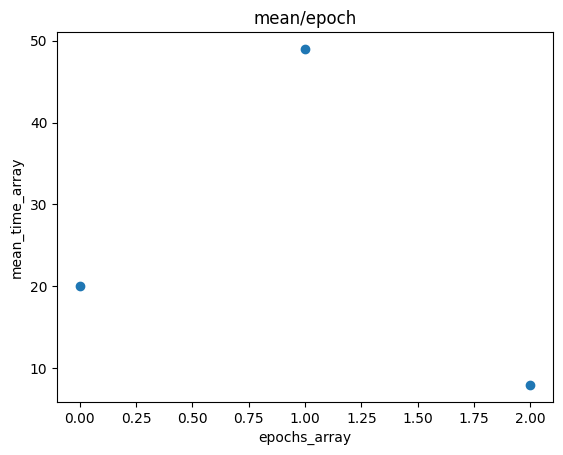

In [8]:
np.random.seed(5)

num_of_inputs = 4
hidden1 = 24 #some indian youtuber used this
hidden2 = 24
out_n = 2

lr = 0.001


layers = [input_layer(num_of_inputs), 
          layer(lr = lr, prev_size = num_of_inputs, my_size=hidden1, activation_type="ReLU"), 
          layer(lr = lr, prev_size = hidden1, my_size=hidden2, activation_type="ReLU"), 
          layer(lr = lr, prev_size = hidden2, my_size=out_n, activation_type='Linear')] #, activation_type="ReLU")]


model = test_env('CartPole-v1')

model.set_brain_layers(layers)
#model.brain.print_info()

model.train()
model.close_env()
#model.brain.print_info()
print("done")

In [9]:
model.close_env()

In [12]:
model.env = gym.make('CartPole-v1', render_mode="human")
# print(env.action_space) # 0 or 1

state, info = model.env.reset(seed=42)
for _ in range(2000):
   action = model.brain.forward(state).argmax().item()
   state, reward, terminated, truncated, info = model.env.step(action)

   if terminated or truncated:
      observation, info = model.env.reset(seed=42)

model.env.close()

In [11]:
# test1nn = plastic_nn()
# layers = [input_layer(2), 
          
#           layer(lr = lr, prev_size = 2, my_size=1), 
#           layer(lr = lr, prev_size = 1, my_size=1)]

# test1nn.append(layers)
# test1nn.print_info()

# test2nn = test1nn.deep_copy()
# test2nn.print_info()
# test2nn.append([layer(lr = lr, prev_size = 1, my_size=2)])
# test2nn.print_info()
# test1nn.print_info()